**Import All the require libraries**

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA


**Read the air passengers data**

In [2]:
tm_data = pd.read_csv("AirPassenger.csv",parse_dates=[0],infer_datetime_format=True)

**Understand the data**

In [3]:
tm_data.head()

,Year-Month,International Airlines Pax
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
tm_data.index

RangeIndex(start=0, stop=144, step=1)

In [5]:
tm_data.set_index('Year-Month',inplace=True)

In [6]:
tm_data.head()

,International Airlines Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Visualization on data**

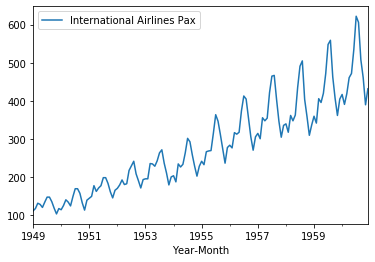

In [7]:
tm_data.plot()

In [8]:
decomposition = sm.tsa.seasonal_decompose(tm_data, model='additive')

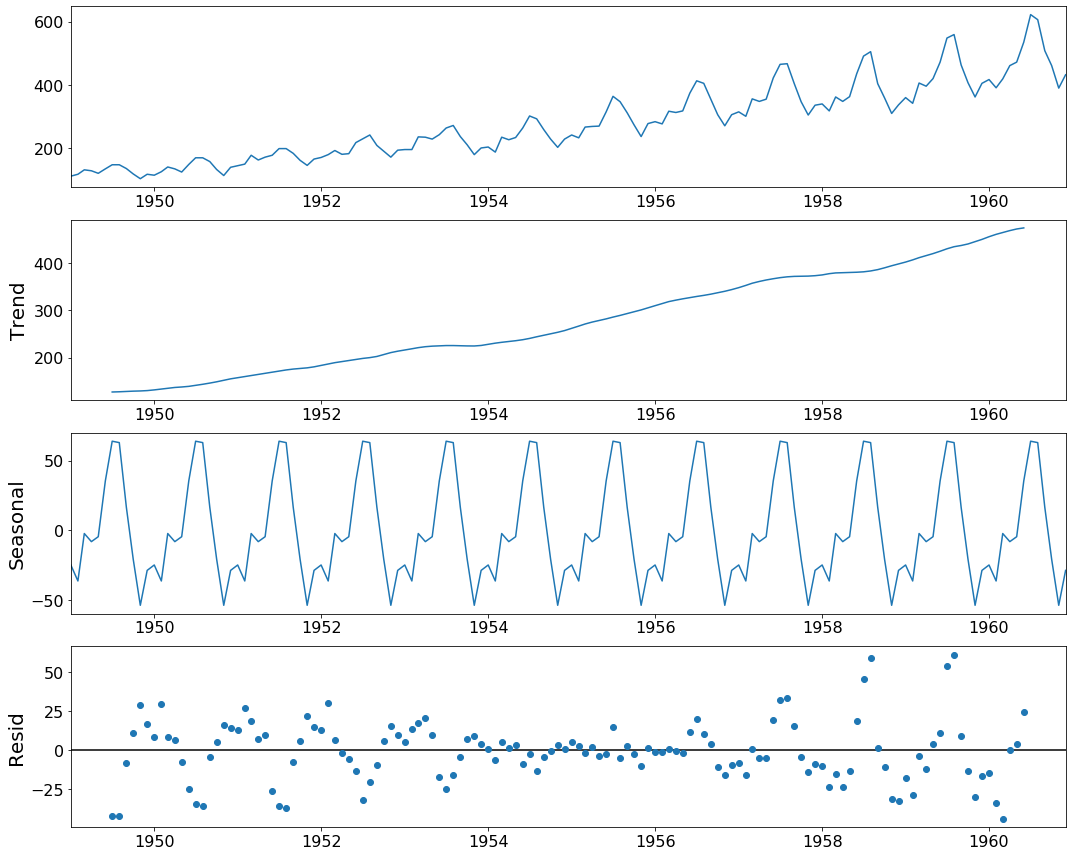

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
decomp = decomposition.plot()

In [10]:
check_vis = tm_data.copy()
check_vis['month'] = check_vis.index.month
check_vis['year'] = check_vis.index.year

Text(0, 0.5, 'No Of Air Passengers')

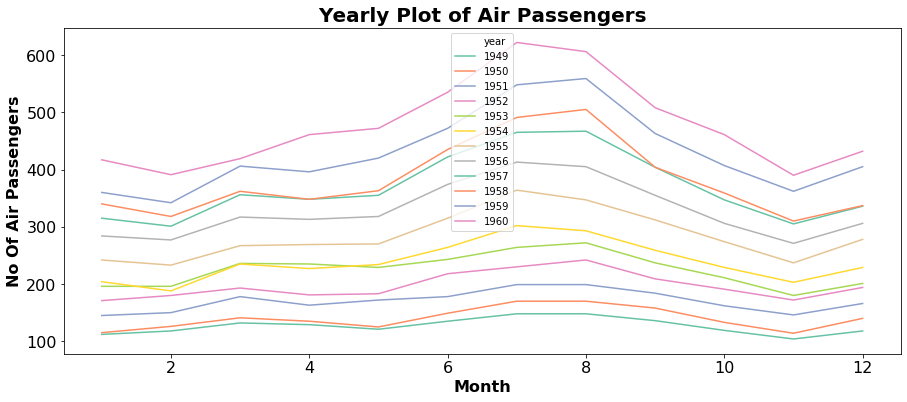

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
palette = sns.color_palette("Set2", 12)
sns.lineplot(check_vis['month'], check_vis['International Airlines Pax'], hue=check_vis['year'], palette=palette)
ax.set_title('Yearly Plot of Air Passengers', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('No Of Air Passengers', fontsize = 16, fontdict=dict(weight='bold'))

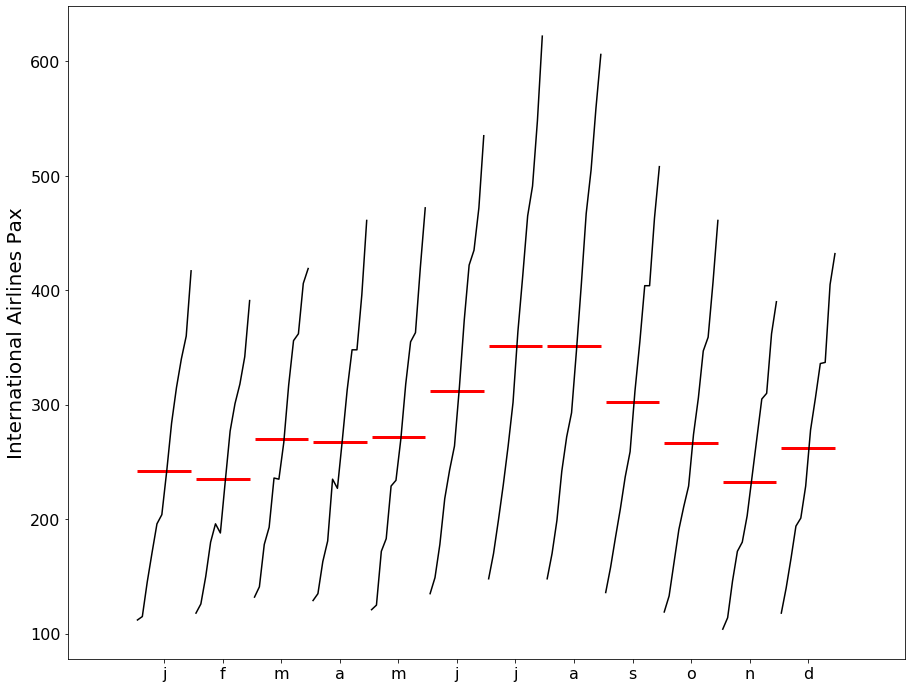

In [13]:
month_plot(tm_data['International Airlines Pax'],ylabel='International Airlines Pax');

**Check for stationary time series**

In [15]:
result = adfuller(tm_data.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


**Removing trend by using log differences**

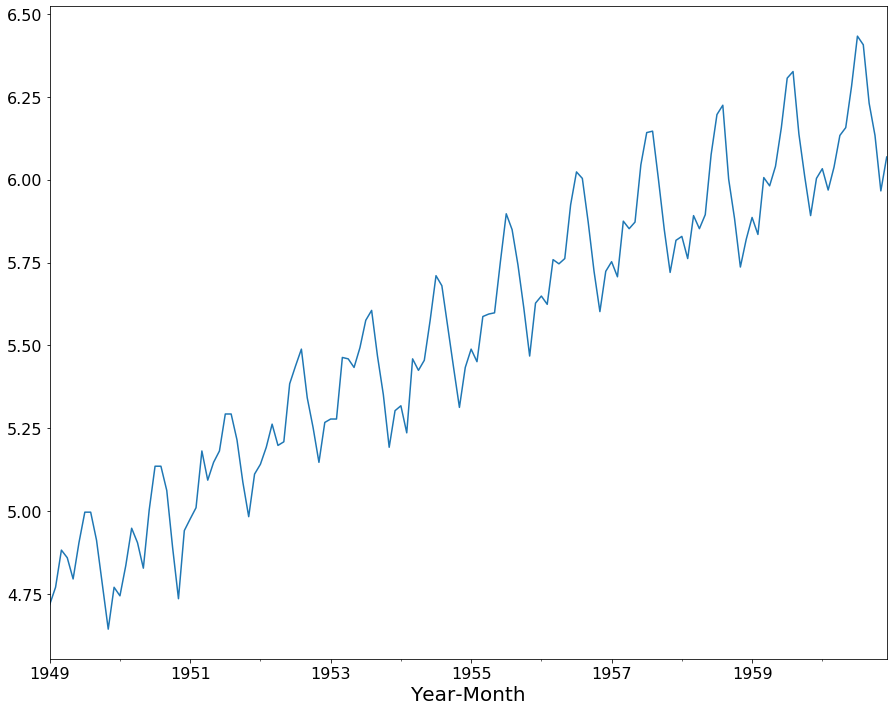

In [16]:
log_passengers = tm_data['International Airlines Pax'].apply(lambda x: np.log(x))
log_passengers.plot()

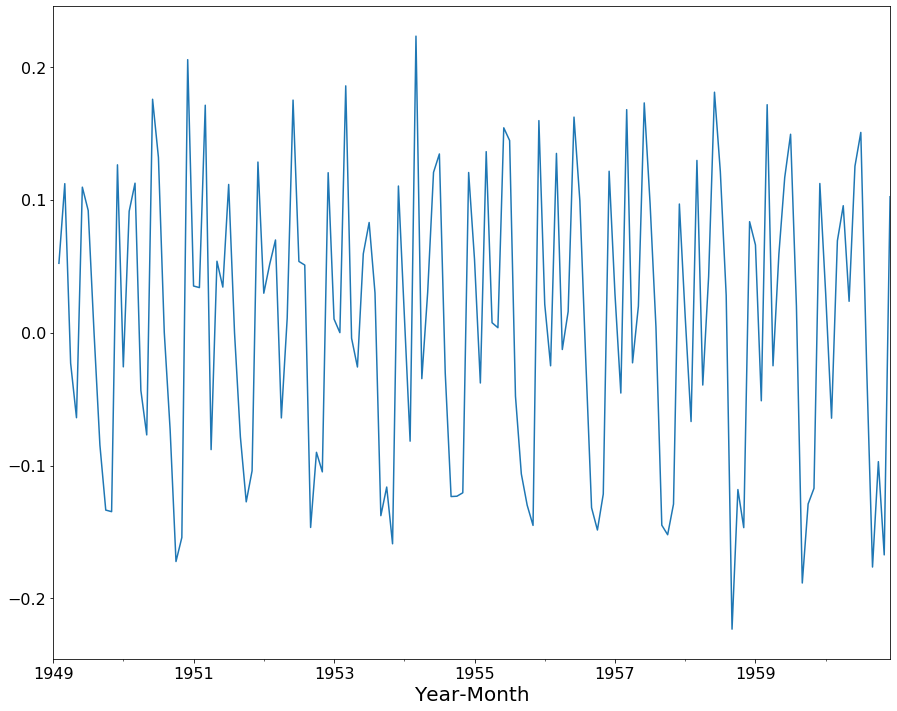

In [17]:
log_passengers_diff = log_passengers - log_passengers.shift()
log_passengers_diff.plot()

In [18]:
log_passengers_diff.dropna(inplace=True)

In [19]:
adfuller(log_passengers_diff.values)

(-2.717130598388145,
 0.0711205481508568,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

**Computing the ACF and PACF Graphs**

In [21]:
log_lag_acf = acf(log_passengers_diff.values, nlags = 36)
log_lag_pacf = pacf(log_passengers_diff.values, nlags = 36)

C:\Users\ajayagop\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


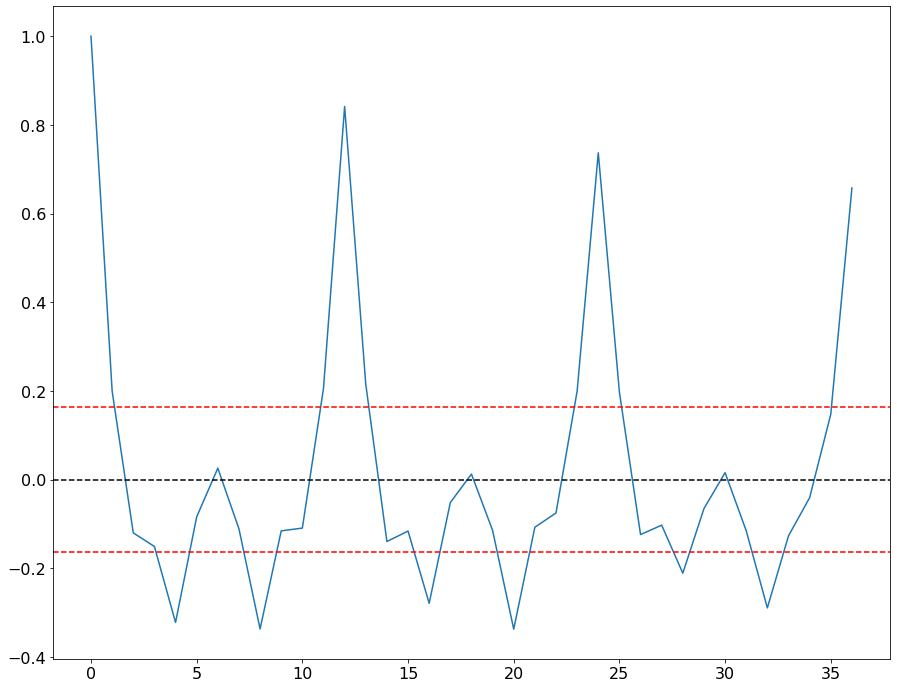

In [23]:
plt.plot(log_lag_acf)
plt.axhline(y=0,linestyle='--', color = 'black')
plt.axhline(y=-1.96/np.sqrt(len(log_passengers_diff)),linestyle='--', color = 'red')
plt.axhline(y=1.96/np.sqrt(len(log_passengers_diff)),linestyle='--', color = 'red')

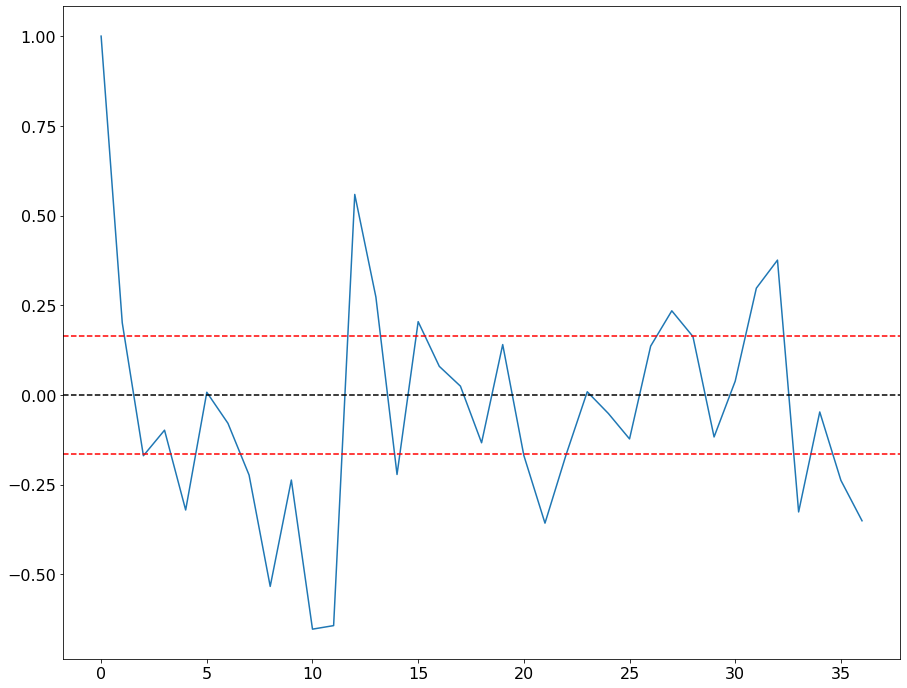

In [24]:
plt.plot(log_lag_pacf)
plt.axhline(y=0,linestyle='--', color = 'black')
plt.axhline(y=-1.96/np.sqrt(len(log_passengers_diff)),linestyle='--', color = 'red')
plt.axhline(y=1.96/np.sqrt(len(log_passengers_diff)),linestyle='--', color = 'red')

**Fitting the ARIMA Model on data**

C:\Users\ajayagop\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ajayagop\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'Residual sum of squares: 1.502')

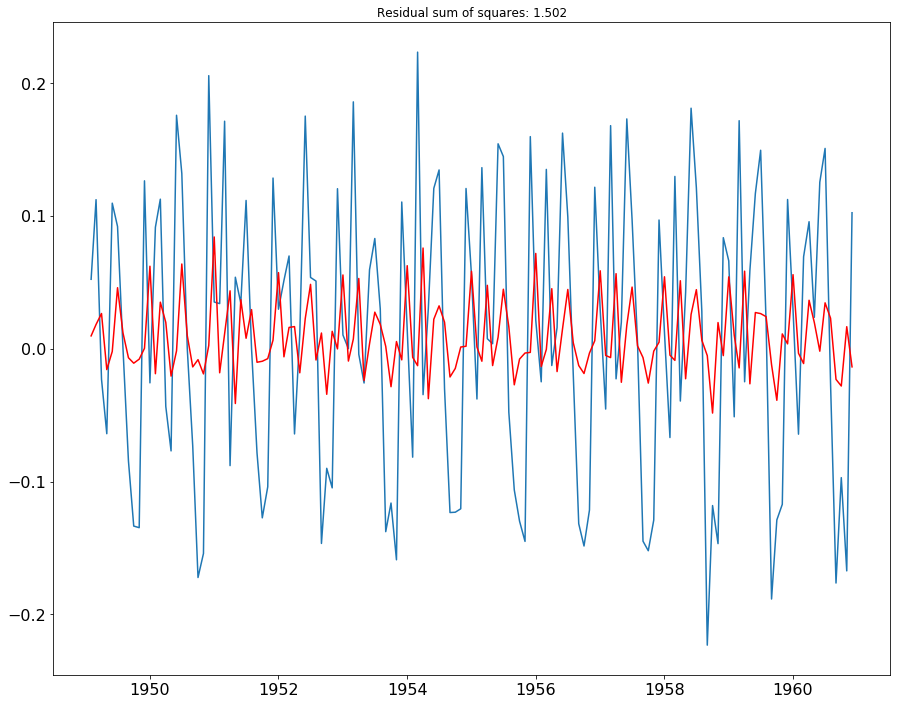

In [25]:
model = ARIMA(log_passengers, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(log_passengers_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('Residual sum of squares: %.3f'% sum((results_AR.fittedvalues-log_passengers_diff)**2))